In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import fastai
from fastai.vision import *
from pathlib import Path
from skimage.io import imread,imshow,imsave
import warnings
from collections import defaultdict
import pandas as pd

In [3]:
from tqdm import tqdm_notebook  as tqdm

In [4]:
path_img = Path('train_images')
lbl_dir = Path('train_labels')
tst_dir = Path('test_images')

In [5]:
df = pd.read_csv('train.csv')

In [6]:
len(df)/4

12568.0

In [7]:
fns = df[~pd.isna(df.EncodedPixels)]['ImageId_ClassId'].values

In [8]:
def_fns_trn = []
for fn in fns:
    def_fns_trn.append(fn[:-2])

In [9]:
def_fns_trn = list(set(def_fns_trn))

In [10]:
len(def_fns_trn)

6666

In [11]:
int(True)

1

In [12]:
data = (ImageList.from_folder(path_img,convert_mode='L')
        #.filter_by_rand(0.01)
       .split_by_rand_pct(0.4)
       .label_from_func(lambda l:int(l.name in def_fns_trn))
        #.add_test(get_image_files(tst_dir))
       .transform(get_transforms(max_rotate=0,max_warp=0), tfm_y=False, size=(256,1600))
       .databunch(bs=4)
       .normalize(stats=imagenet_stats))

In [13]:
_ = data.train_ds.y.items

In [14]:
_ = data.one_batch()

In [13]:
from fastai.metrics import AUROC

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,AUROC()])

In [16]:
learn.load('classifier');

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


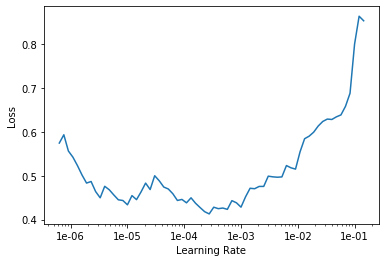

In [27]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(1,0.001)

epoch,train_loss,valid_loss,error_rate,auroc,time
0,0.418019,0.289064,0.113012,0.959968,03:55


In [20]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1,0.0001)

epoch,train_loss,valid_loss,error_rate,auroc,time
0,0.414518,0.239663,0.087147,0.972604,05:18


In [28]:
learn.fit_one_cycle(1,0.00001)

epoch,train_loss,valid_loss,error_rate,auroc,time
0,0.395095,0.208681,0.074811,0.977599,05:16


In [29]:
learn.save('classifier',return_path=True)

PosixPath('train_images/models/classifier.pth')

# predict

In [13]:
data1 = (ImageList.from_folder(path_img,convert_mode='L')
        #.filter_by_rand(0.01)
       .split_by_rand_pct()
       .label_from_func(lambda l:int(l.name in def_fns_trn))
        .add_test(get_image_files(tst_dir))
       .transform(get_transforms(max_rotate=0,max_warp=0), tfm_y=False, size=(256,1600))
       .databunch(bs=8)
       .normalize(stats=imagenet_stats))

In [14]:
learn = cnn_learner(data1, models.resnet34, metrics=[error_rate,AUROC()])

In [15]:
preds = learn.get_preds(DatasetType.Test)

In [17]:
learn.data.test_ds.items

array([PosixPath('test_images/6686b7448.jpg'), PosixPath('test_images/fc6ec9b13.jpg'),
       PosixPath('test_images/19c0e7a52.jpg'), PosixPath('test_images/7be8cd98d.jpg'), ...,
       PosixPath('test_images/589dd7157.jpg'), PosixPath('test_images/95eb51548.jpg'),
       PosixPath('test_images/fc2500486.jpg'), PosixPath('test_images/ee5d0ed3e.jpg')], dtype=object)

In [19]:
preds[0].shape

torch.Size([1801, 2])

In [20]:
preds[1].shape

torch.Size([1801])

In [21]:
preds[0][:10]

tensor([[0.1126, 0.8874],
        [0.0070, 0.9930],
        [0.0290, 0.9710],
        [0.1090, 0.8910],
        [0.0105, 0.9895],
        [0.2646, 0.7354],
        [0.2787, 0.7213],
        [0.1227, 0.8773],
        [0.2104, 0.7896],
        [0.1021, 0.8979]])

In [28]:
_ = np.argmax(preds[0].numpy(),axis=1);
_

array([1, 1, 1, 1, ..., 1, 1, 1, 1])

In [29]:
len(_)

1801

In [30]:
_.sum()

1789

In [31]:
good_images = []
for i,fl in enumerate(learn.data.test_ds.items):
    if _[i] == 0:
        good_images.append(fl)

In [32]:
good_images

[PosixPath('test_images/6583c7755.jpg'),
 PosixPath('test_images/8aff1bbfa.jpg'),
 PosixPath('test_images/07ab05fc1.jpg'),
 PosixPath('test_images/d9411a571.jpg'),
 PosixPath('test_images/c8d5e181c.jpg'),
 PosixPath('test_images/858e74ccd.jpg'),
 PosixPath('test_images/92a1948f6.jpg'),
 PosixPath('test_images/bb9317b39.jpg'),
 PosixPath('test_images/958ecd28d.jpg'),
 PosixPath('test_images/a883cd737.jpg'),
 PosixPath('test_images/03bb32e93.jpg'),
 PosixPath('test_images/5575ead92.jpg')]

# check preds

In [17]:
preds = learn.get_preds(DatasetType.Valid)

In [18]:
predictions = np.argmax(preds[0].numpy(),axis=1)

In [19]:
len(predictions)

5027

In [20]:
truth = preds[1].numpy()

In [21]:
len(truth)

5027

In [22]:
_ = (predictions == truth)

In [23]:
_.mean()

0.9321663019693655

In [14]:
from skimage.io import imread,imshow,imsave

In [18]:
_ = data.train_ds.items[0]

In [19]:
img = imread(_)

In [36]:
lbl = imread(lbl_dir/(_.stem+'.png'))

In [22]:
img.shape

(256, 1600, 3)

In [35]:
lbl.shape

(256, 1600)

In [24]:
type(img)

imageio.core.util.Array

In [25]:
img.

In [40]:
__ = np.concatenate((img,np.expand_dims(lbl,axis=2)),axis=2)

In [41]:
__.shape

(256, 1600, 4)

In [42]:
imsave('gg.png',__)

In [43]:
lol = imread('gg.png')

In [44]:
lol.shape

(256, 1600, 4)

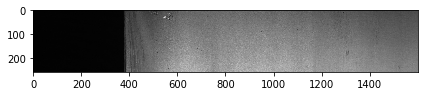

In [48]:
imshow(lol[:,:,:3])